In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy import optimize,stats,special
import mplhep as hep

In [2]:
# plt.style.available
plt.style.use("seaborn-paper")
mpl.rcParams.update({
    'font.family': 'STIXGeneral',
    # 'font.sans-serif': ['Times New Roman'],
    'mathtext.default':'rm',
    'mathtext.fontset':'stix',
    'mathtext.fallback_to_cm':False,
    "axes.titlesize" : 24,
"axes.labelsize" : 20,
"lines.linewidth" : 3,
"lines.markersize" : 10,
"xtick.labelsize" : 16,
"ytick.labelsize" : 16,
'savefig.dpi':300,
'legend.fontsize':13,
'figure.figsize':(8,6)
    })
plt.rcParams['axes.unicode_minus'] = False


/Users/sitianqian/opt/miniconda3/envs/skhep/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/Users/sitianqian/opt/miniconda3/envs/skhep/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/Users/sitianqian/opt/miniconda3/envs/skhep/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


In [10]:
datadir = "../data/"

key1 = ["Co.dat","Env_half.dat","Eu_half.dat"]
key2 = ["Env_full.dat","Eu_full.dat","Sol.dat"]

In [11]:
data1 = {key[:-4]:np.loadtxt(datadir + key) for key in key1}
data2 = {key[:-4]:np.loadtxt(datadir + key) for key in key2}

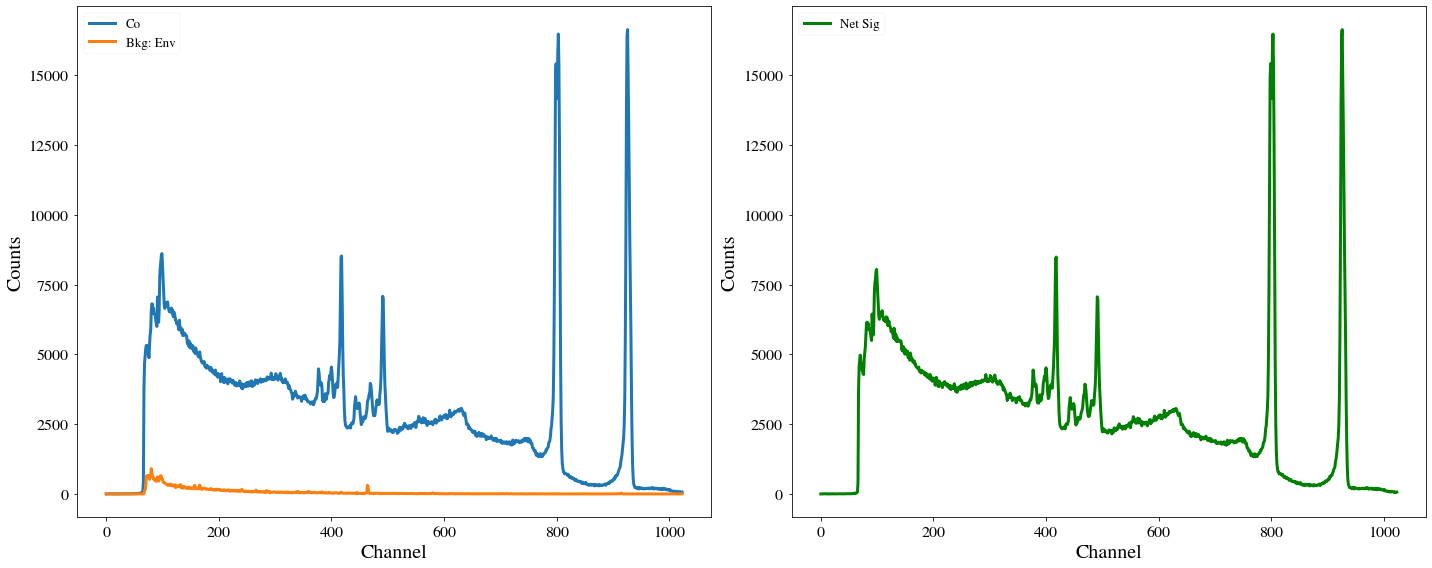

In [38]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(data1["Co"],label="Co")
plt.plot(data1["Env_half"],label = "Bkg: Env")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.legend()
plt.subplot(122)
plt.plot(data1["Co"] - data1["Env_half"],label="Net Sig",color = "green")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.legend()
plt.tight_layout()
plt.savefig("../plots/Co_net.pdf")

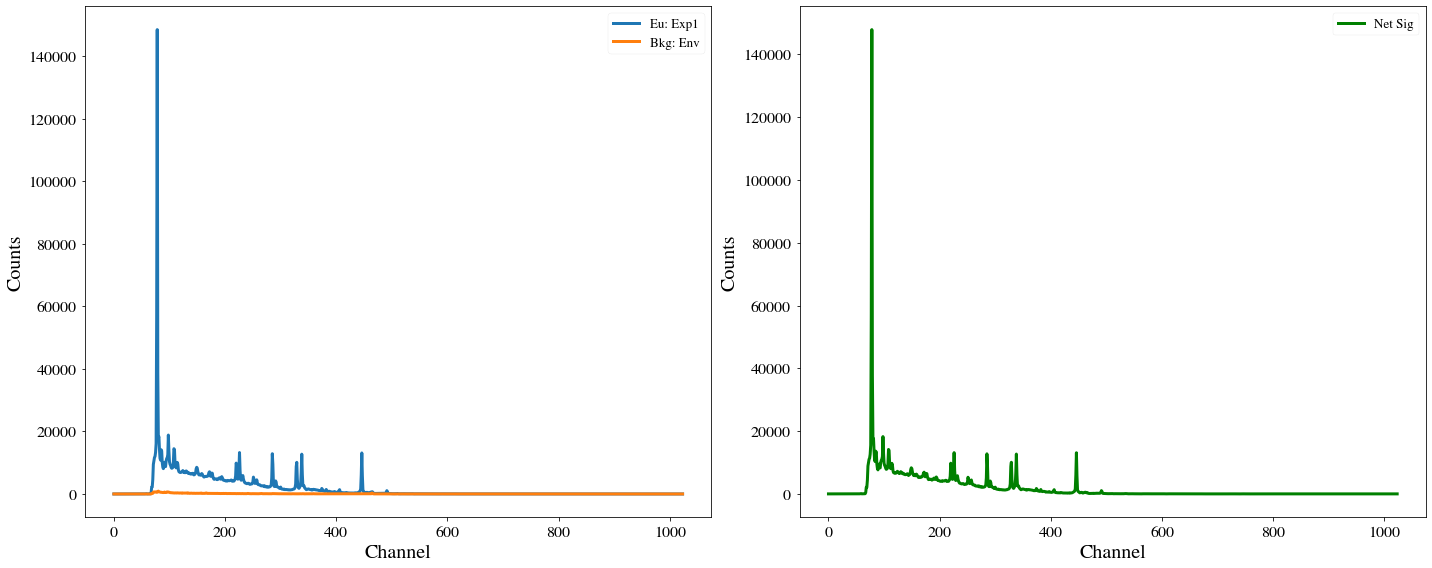

In [39]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(data1["Eu_half"],label="Eu: Exp1")
plt.plot(data1["Env_half"],label = "Bkg: Env")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.legend()
plt.subplot(122)
plt.plot(data1["Eu_half"] - data1["Env_half"],label="Net Sig",color = "green")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.legend()
plt.tight_layout()
plt.savefig("../plots/Eu_half_net.pdf")

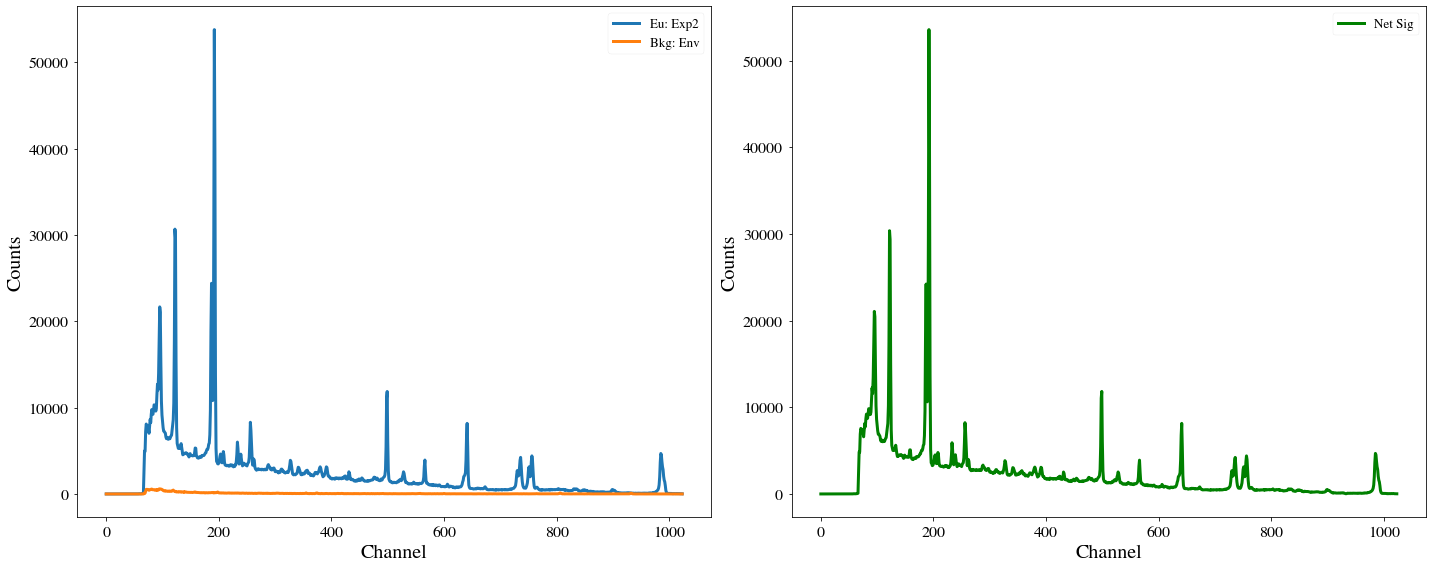

In [40]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(data2["Eu_full"],label="Eu: Exp2")
plt.plot(data2["Env_full"],label = "Bkg: Env")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.legend()
plt.subplot(122)
plt.plot(data2["Eu_full"] - data2["Env_full"],label="Net Sig",color = "green")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.legend()
plt.tight_layout()
plt.savefig("../plots/Eu_full_net.pdf")

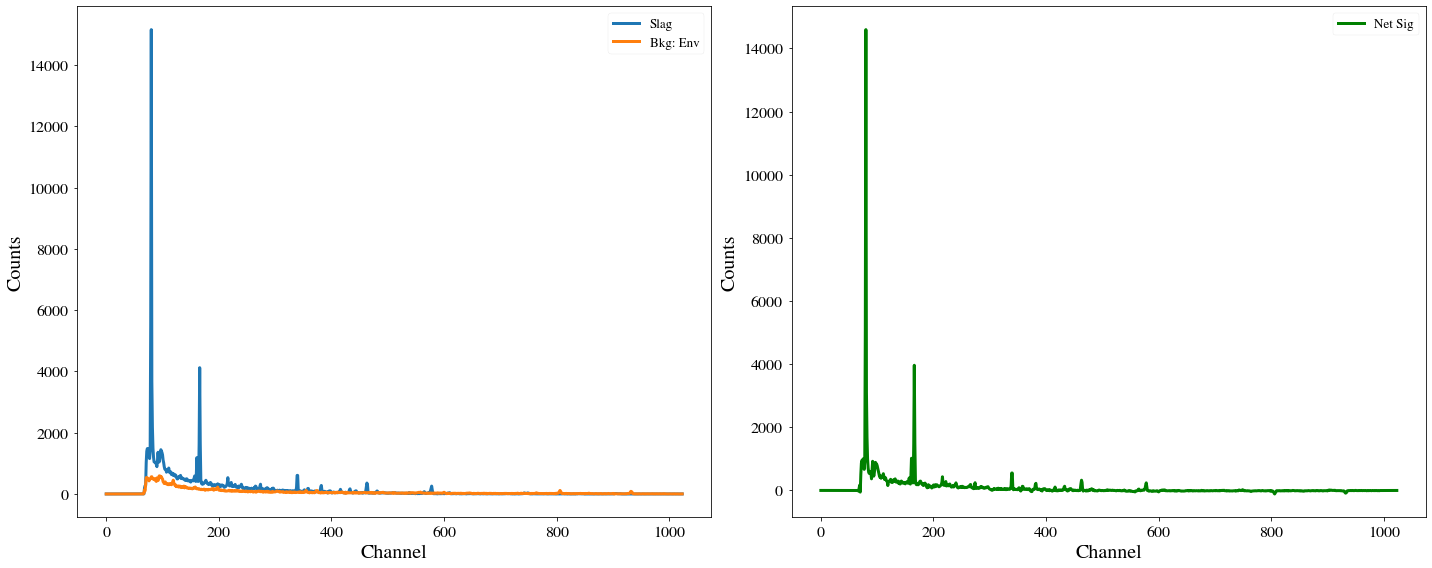

In [41]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(data2["Sol"],label="Slag")
plt.plot(data2["Env_full"],label = "Bkg: Env")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.legend()
plt.subplot(122)
plt.plot(data2["Sol"] - data2["Env_full"],label="Net Sig",color = "green")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.legend()
plt.tight_layout()
plt.savefig("../plots/slag_net.pdf")

In [33]:
NetSigCo = data1["Co"] - data1["Env_half"]
NetSigCo[NetSigCo < 0 ] = 0
NetSigEuHalf = data1["Eu_half"] - data1["Env_half"]
NetSigEuHalf[NetSigEuHalf < 0] = 0
NetSigEuFull = data2["Eu_full"] - data2["Env_full"]
NetSigEuFull[NetSigEuFull < 0] = 0
NetSigSlag = data2["Sol"] - data2["Env_full"]
NetSigSlag[NetSigSlag < 0] = 0

Channel = np.arange(1,1025)
# Channel.shape

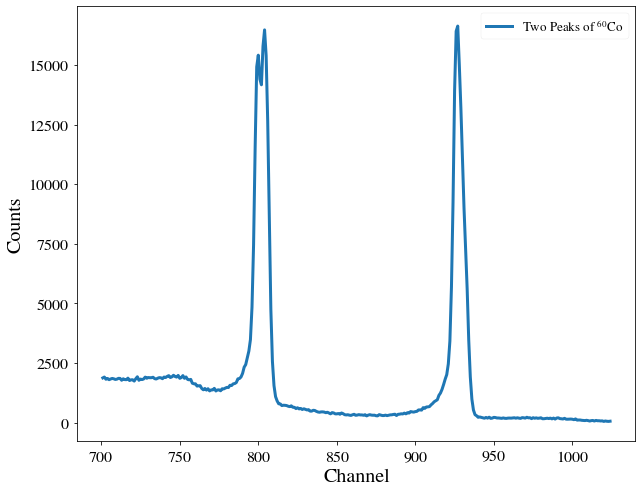

In [51]:
plt.figure(figsize=(10,8))
plt.plot(Channel[Channel > 700],NetSigCo[Channel > 700],label = "Two Peaks of $^{60}$Co")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.legend(loc="upper right")
plt.savefig("../plots/Co_two_Peak.pdf")